<a href="https://colab.research.google.com/github/prateekpurwar/tensorflow/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

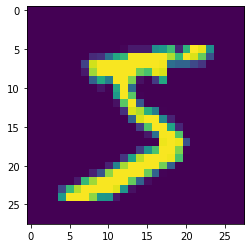

In [31]:
plt.imshow(X_train[0])
plt.show()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_test.shape

(10000, 28, 28)

In [34]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
input_shape=X_train[0].shape

In [0]:
model = Sequential([
                    Conv2D(filters=32 ,kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=input_shape, padding='valid'),
                    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
                    MaxPool2D(pool_size=(2,2), padding='valid'),
                    Dropout(0.25),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.50),
                    Dense(10, activation='softmax')
                   ])

In [64]:
model.summary() # output_channels * (input_channels * window_size + 1) == number_parameters ### 64*(32*(3*3)+1) # 1 for bias

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)             

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 145s 310ms/step - loss: 0.1748 - accuracy: 0.9496 - val_loss: 0.0581 - val_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 146s 311ms/step - loss: 0.1042 - accuracy: 0.9694 - val_loss: 0.0444 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 145s 309ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 143s 305ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.0358 - val_accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 144s 307ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0336 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 144s 308ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0312 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 148s 316ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0313 -

In [75]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.0291 - accuracy: 0.9925


[0.029091833159327507, 0.9925000071525574]

In [0]:
def plot(hist,epochs):
  epoch_range = range(1,epochs+1)
  
  plt.style.use('ggplot')
  
  plt.plot(epoch_range, hist.history['accuracy'])
  plt.plot(epoch_range, hist.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, hist.history['loss'])
  plt.plot(epoch_range, hist.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

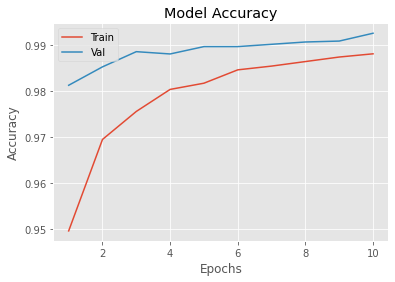

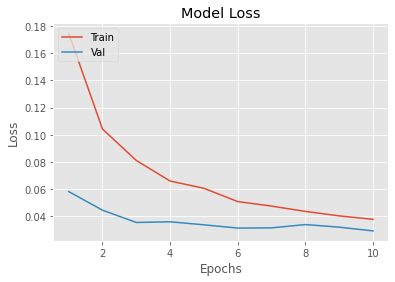

In [77]:
plot(hist=hist, epochs=10)